# Static Network Analysis

In [1]:
import geopandas as gp
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from shapely.geometry import Point
import nafot
import time
from tqdm import tqdm, tqdm_notebook
import networkx as nx
import pickle
from scipy import sparse
plt.style.use('ggplot')
%matplotlib inline

### Load the network

In [2]:
# Read the network from gpickle
network = nx.read_gpickle("../../Data/network/static_network_10K.gpickle")

## Network Characteristics

In [3]:
print(f'Number of nodes: {network.number_of_nodes():,d}\n\
Number of edges {network.number_of_edges():,d}')

Number of nodes: 9,441
Number of edges 58,490


In [ ]:
network

### Degree Distribution

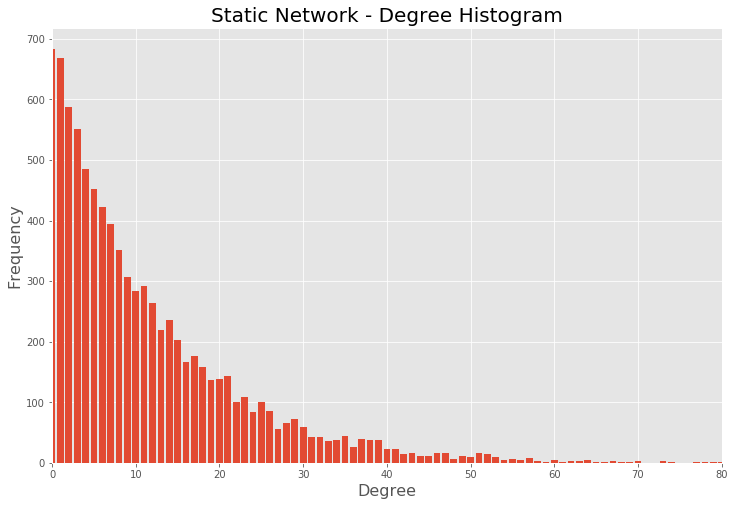

In [4]:
# Get the network degree histogram
degree_hist = nx.degree_histogram(network)[2:]

# Plot the histogram
fig = plt.figure(figsize=(12,8))
plt.bar(np.arange(len(degree_hist)), np.array(degree_hist))
plt.xlim([0,80])
plt.title('Static Network - Degree Histogram', fontsize=20)
plt.xlabel('Degree', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.show()

In [5]:
f'The density of the static contact network is {nx.density(network):3f}'

'The density of the static contact network is 0.001313'

## Export to Gephi

In [6]:
# Change dtype of subdist to int
for n in network.nodes:
    network.nodes[n]['subdist'] = int(network.nodes[n]['subdist'])

# Remove contact distribution
for n in network.nodes:
    network.nodes[n].pop('contact_dist')
    network.nodes[n].pop('remaining_contact_dist')

In [7]:
# Export to .gexf file for Gephi
nx.write_gexf(network, "../../Data/network/static_network_10K.gexf")